In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [39]:
# Load the dataset
file_path = '/Users/sanjayramrajasrinsanjayivasan/Documents/Data Mining project/Final_BankChurners.csv'
data = pd.read_csv(file_path)

data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [40]:
# Checking for missing values and data types
data_info = {
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Unique Values": data.nunique()
}
pd.DataFrame(data_info)


,Data Types,Missing Values,Unique Values
CLIENTNUM,int64,0,10127
Attrition_Flag,object,0,2
Customer_Age,int64,0,45
Gender,object,0,2
Dependent_count,int64,0,6
Education_Level,object,0,7
Marital_Status,object,0,4
Income_Category,object,0,6
Card_Category,object,0,4
Months_on_book,int64,0,44


In [41]:
#Analyzing Our Target Varaible
distinct_values = data['Attrition_Flag'].unique()
print(distinct_values)

['Existing Customer' 'Attrited Customer']


In [42]:
value_counts = data['Attrition_Flag'].value_counts()

In [43]:
print(value_counts)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


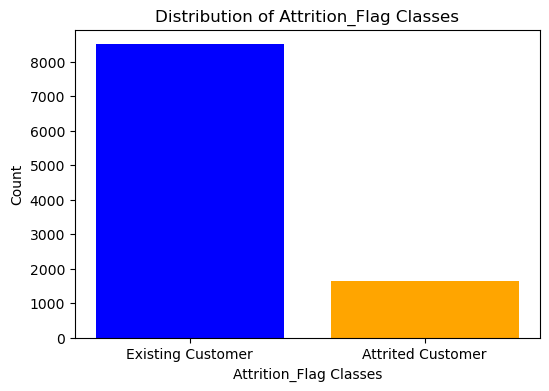

In [44]:
#Histogram to depict the class imbalance
class_counts = data['Attrition_Flag'].value_counts()

# Plotting a histogram to visualize class imbalance
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xlabel('Attrition_Flag Classes')
plt.ylabel('Count')
plt.title('Distribution of Attrition_Flag Classes')
plt.show()

In [45]:
# Assuming 'data' is your DataFrame
column_names = data.columns.tolist()
print(column_names)

['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [46]:
print(data['Attrition_Flag'])

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object


In [47]:
#Lets Start with Customer Age and their relationship
print(data['Customer_Age'])

0        45
1        49
2        51
3        40
4        40
         ..
10122    50
10123    41
10124    44
10125    30
10126    43
Name: Customer_Age, Length: 10127, dtype: int64


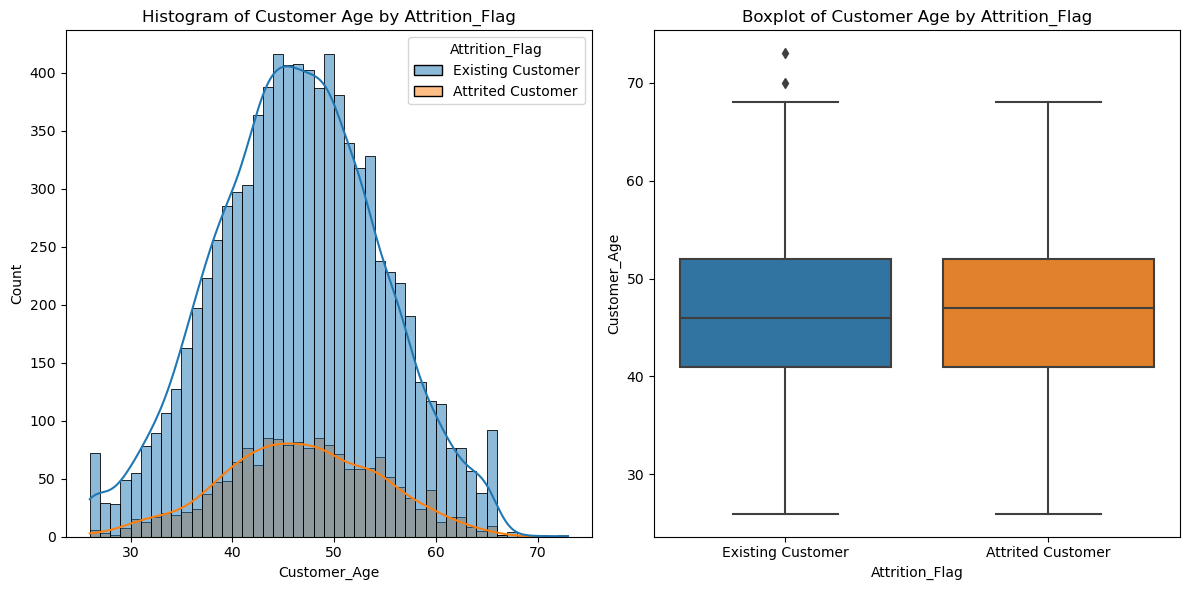

In [48]:
'''In this histplot and boxplot we can see that the age of both exisiting and attrited customers lie between the age group of 40-60. 
We can check multicollinearity with other varaibles for further analysis'''

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for two plots

sns.histplot(data=data, x='Customer_Age', hue='Attrition_Flag', kde=True, ax=axes[0])
axes[0].set_title('Histogram of Customer Age by Attrition_Flag')

sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=data, ax=axes[1])
axes[1].set_title('Boxplot of Customer Age by Attrition_Flag')

plt.tight_layout()  
plt.show()

In [49]:
# Assuming 'df' is your DataFrame
column_names = data.columns.tolist()
print("Column names:", column_names)

Column names: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [50]:
# Given counts of each class
existing_customer_count = 8500
attrited_customer_count = 1627

# Calculate total count
total_count = existing_customer_count + attrited_customer_count

# Calculate percentages
percentage_existing_customer = (existing_customer_count / total_count) * 100
percentage_attrited_customer = (attrited_customer_count / total_count) * 100

# Print percentages
print("Percentage of Existing Customer: {:.2f}%".format(percentage_existing_customer))
print("Percentage of Attrited Customer: {:.2f}%".format(percentage_attrited_customer))

Percentage of Existing Customer: 83.93%
Percentage of Attrited Customer: 16.07%


In [51]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


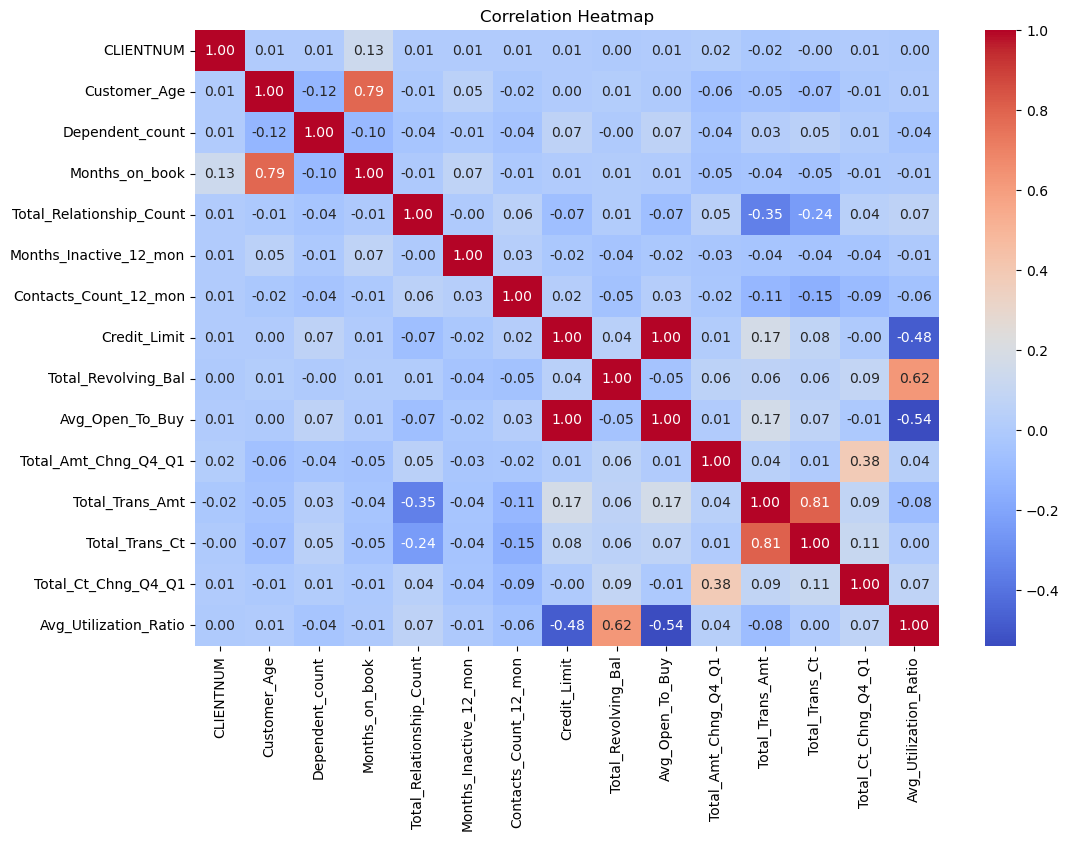

In [52]:
# Select numerical columns for correlation matrix
numerical_columns = data.select_dtypes(include=['number']).columns

# Calculate correlation matrix
correlation_matrix = data[numerical_columns].corr()


# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [53]:
# Assuming 'data' is your dataset
# Extract 'Customer_Age' and 'Months_on_Book' columns
customer_age = data['Customer_Age']
months_on_book = data['Months_on_book']

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(customer_age, months_on_book)

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print("There is a ")

Pearson Correlation Coefficient: 0.7889
There is a 


In [54]:
# # Assuming 'data' is your dataset
# # Separate features and target variable
# X = data.drop(['Attrition_Flag'], axis=1)  # Features
# y = data['Attrition_Flag']  # Target variable

# # Initialize Random Forest classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Fit the model
# rf.fit(X, y)

# # Get feature importances
# feature_importances = rf.feature_importances_

# # Create a DataFrame to display feature importances
# feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# print(feature_importance_df)

In [55]:
# Assuming 'df' is your DataFrame
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [56]:
print(data['Education_Level'])

0        High School
1           Graduate
2           Graduate
3        High School
4         Uneducated
            ...     
10122       Graduate
10123        Unknown
10124    High School
10125       Graduate
10126       Graduate
Name: Education_Level, Length: 10127, dtype: object


In [57]:
# Assuming 'data' is your DataFrame
distinct_education_levels = data['Education_Level'].unique()
print(distinct_education_levels)


['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


In [58]:
# Assuming 'data' is your DataFrame
unknown_education_count = data[data['Education_Level'] == 'Unknown'].shape[0]
print("Number of unknown values in Education_Level:", unknown_education_count)

Number of unknown values in Education_Level: 1519


In [59]:
# Assuming 'df' is your DataFrame
num_rows, num_columns = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 10127
Number of columns: 21


In [60]:
# Assuming 'data' is your DataFrame
distinct_Marital_Status = data['Marital_Status'].unique()
print(distinct_Marital_Status)

['Married' 'Single' 'Unknown' 'Divorced']


In [61]:
distinct_Income_Category = data['Income_Category'].unique()
print(distinct_Income_Category)

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


In [62]:
distinct_Card_Category = data['Card_Category'].unique()
print(distinct_Card_Category)

['Blue' 'Gold' 'Silver' 'Platinum']


Analysis:

1)Upon the analysis , it is come under my knowledge that there are 'Unknown' values which need to be handled and in Categorical Variables before proceeding to furter analysis.

2)And the Correlation plot suggests that Customer_Age and Months_on_book is related and performed Pearson correlation test which gave us an inference that the linear relationship is highly significant.

3)Before proceeding with fetaure importance, we have to handle the Categorical Varaibles.

4)Proceeded with Feature Importance of Numerical Variables wrt to Target Variable

In [63]:
#Feature Importance of Numerical Columns

# Selecting only numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_numerical = data[numerical_columns]  # Features (only numerical columns)
y_categorical = data['Attrition_Flag']  # Categorical target variable


rf = RandomForestClassifier(n_estimators=100, random_state=42)


rf.fit(X_numerical, y_categorical)

# Get feature importances
feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_numerical.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                     Feature  Importance
11           Total_Trans_Amt    0.187412
12            Total_Trans_Ct    0.179777
8        Total_Revolving_Bal    0.114790
13       Total_Ct_Chng_Q4_Q1    0.108992
4   Total_Relationship_Count    0.070636
10      Total_Amt_Chng_Q4_Q1    0.063194
14     Avg_Utilization_Ratio    0.054697
7               Credit_Limit    0.034916
1               Customer_Age    0.034011
9            Avg_Open_To_Buy    0.033041
6      Contacts_Count_12_mon    0.028833
0                  CLIENTNUM    0.027685
5     Months_Inactive_12_mon    0.024919
3             Months_on_book    0.024748
2            Dependent_count    0.012350


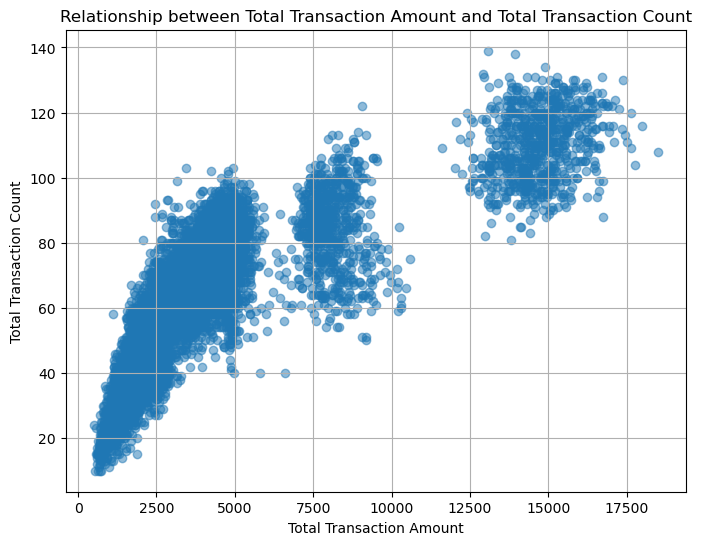

In [64]:
# Extracting the columns of interest
total_trans_amt = data['Total_Trans_Amt']
total_trans_ct = data['Total_Trans_Ct']

# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(total_trans_amt, total_trans_ct, alpha=0.5)
plt.title('Relationship between Total Transaction Amount and Total Transaction Count')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')
plt.grid(True)
plt.show()

In [65]:
# Assuming 'data' is your dataset
# Extract 'Customer_Age' and 'Months_on_Book' columns
transaction_amount = data['Total_Trans_Amt']
transaction_count = data['Total_Trans_Ct']

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(transaction_amount, transaction_count)

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")

Pearson Correlation Coefficient: 0.8072


Analysis:

Calculated the Pearson Coefficient with the intent of dropping them, and the  Pearson Correlation Coefficient: 0.8072 indicates a strong positive correlation between 'Total_Trans_Amt' and 'Total_Trans_Ct'.

Variable Importance: Total_Trans_Amt    0.187412, Total_Trans_Ct    0.179777

The Variable_Importance shows us taht they are highly important to our model and it is not ideal to drop them.

In [66]:
print(data.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [67]:
import pandas as pd

# Assuming your dataset is named 'data'
data.drop(columns=['CLIENTNUM'], inplace=True)

In [68]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [70]:
# Assuming your DataFrame is named 'data'
print(data['Months_on_book'])

0        39
1        44
2        36
3        34
4        21
         ..
10122    40
10123    25
10124    36
10125    36
10126    25
Name: Months_on_book, Length: 10127, dtype: int64


In [72]:
print(data['Months_on_book'].unique())

[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]


In [73]:
print(data['Attrition_Flag'].unique())

['Existing Customer' 'Attrited Customer']


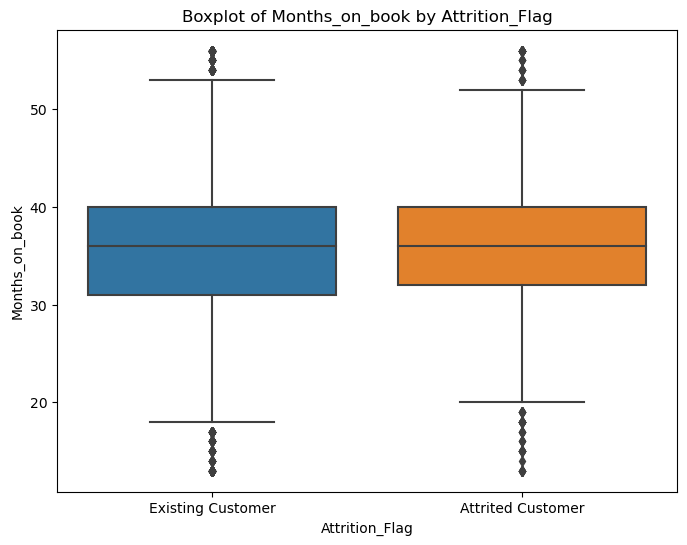

In [75]:
# Assuming your DataFrame is named 'data'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=data)
plt.xlabel('Attrition_Flag')
plt.ylabel('Months_on_book')
plt.title('Boxplot of Months_on_book by Attrition_Flag')
plt.show()

In [78]:

existing_customers = data[data['Attrition_Flag'] == 'Existing Customer']['Months_on_book']
attrited_customers = data[data['Attrition_Flag'] == 'Attrited Customer']['Months_on_book']

t_stat, p_value = ttest_ind(existing_customers, attrited_customers, equal_var=False)  # Assuming unequal variances

print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")

t-statistic: -1.4042246373276999
P-value: 0.16038505264259176


Inference from t-test:

The t-statistic obtained is approximately -1.40, and the corresponding p-value is approximately 0.160.

Given the p-value of 0.160, assuming a typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there isn't enough evidence to conclude that there is a significant difference in the means of 'Months_on_book' between 'Existing Customer' and 'Attrited Customer' groups.

In other words, based on this analysis, there isn't strong statistical evidence to support the idea that the average number of months a customer has been with the bank ('Months_on_book') significantly differs between customers who have attrited and those who are still existing customers.

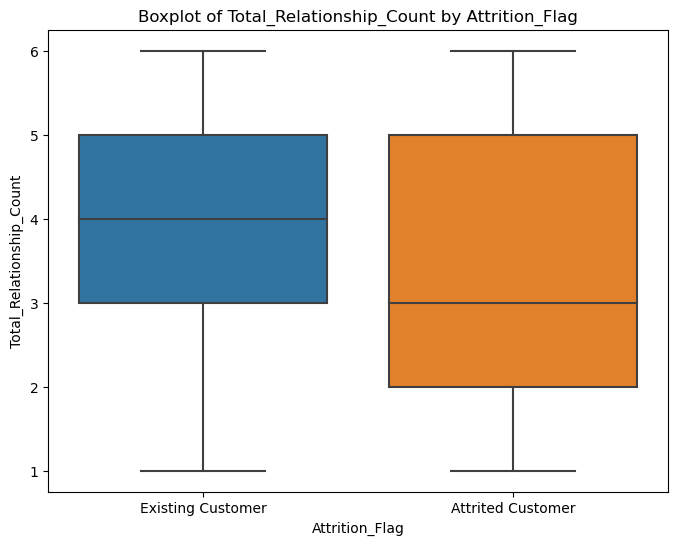

In [79]:
# Assuming your DataFrame is named 'data'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=data)
plt.xlabel('Attrition_Flag')
plt.ylabel('Total_Relationship_Count')
plt.title('Boxplot of Total_Relationship_Count by Attrition_Flag')
plt.show()

In [80]:
# Separating 'Total_Relationship_Count' data for the two groups
existing_customers_rel = data[data['Attrition_Flag'] == 'Existing Customer']['Total_Relationship_Count']
attrited_customers_rel = data[data['Attrition_Flag'] == 'Attrited Customer']['Total_Relationship_Count']

# Performing independent t-test
t_stat_rel, p_value_rel = ttest_ind(existing_customers_rel, attrited_customers_rel, equal_var=False)  # Assuming unequal variances

# Displaying results
print(f"t-statistic for Total_Relationship_Count: {t_stat_rel}")
print(f"P-value for Total_Relationship_Count: {p_value_rel}")

t-statistic for Total_Relationship_Count: 14.944451354287043
P-value for Total_Relationship_Count: 3.225023329499345e-48


In [81]:
print(data['Total_Relationship_Count'].unique())

[5 6 4 3 2 1]


In [83]:
# Creating a contingency table
contingency_table_rel = pd.crosstab(data['Total_Relationship_Count'], data['Attrition_Flag'])

# Chi-Square test
chi2_rel, p_value_rel, _, _ = chi2_contingency(contingency_table_rel)

# Displaying results
print(f"Chi-Square Statistic for Total_Relationship_Count: {chi2_rel}")
print(f"P-value for Total_Relationship_Count: {p_value_rel}")

Chi-Square Statistic for Total_Relationship_Count: 284.0675122272908
P-value for Total_Relationship_Count: 2.6610499913717976e-59


Analyis:
After considering the 'Total_Relationship_Count'as both numerical and categorical concerning customer attrition.

P-value of both the Chi-square and t-test is statsting that the varaible 'Total_Relationship_Count' is stastically significant making us give the below conclusions:

1)Both approaches suggest a relationship between 'Total_Relationship_Count' and attrition, albeit from different analytical perspectives.

2)The interpretations align in suggesting that higher counts of relationships or more extensive engagement might correspond to decreased attrition rates.